## Implementing A Simplified Attention Mechanism

<div class="alert alert-block alert-success">
    
Consider the following input sentence , which has already been embedded into 3- dim vectors.
We choose a small embedding dim for illustration purpose to ensure it fits on the page without breaks:

</div>

In [2]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],  # your      (x^1)
     [0.55, 0.87, 0.66],  # journey   (x^2)
     [0.57, 0.85, 0.64],  # starts    (x^3)
     [0.22, 0.58, 0.34],  # with      (x^4)
     [0.77, 0.25, 0.10],  # one       (x^5)
     [0.05, 0.81, 0.55]]  # step      (x^6)
 )

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

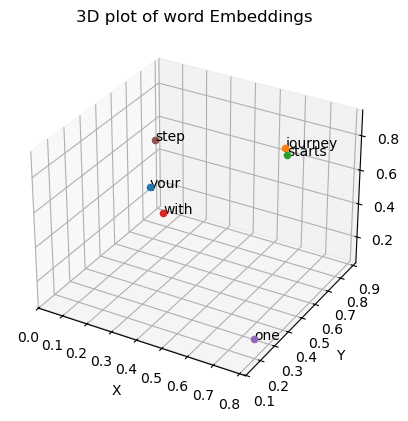

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words = ["your","journey","starts","with","one","step"]

x_coords = inputs[:,0].numpy()
y_coords = inputs[:,1].numpy()
z_coords = inputs[:,2].numpy()


# create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')


# plot each point and annotate with corresponding word
for x,y,z , word in zip(x_coords, y_coords,z_coords,words):
    ax.scatter(x,y,z)
    ax.text(x,y,z,word, fontsize=10)


# set label for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D plot of word Embeddings')
plt.show()

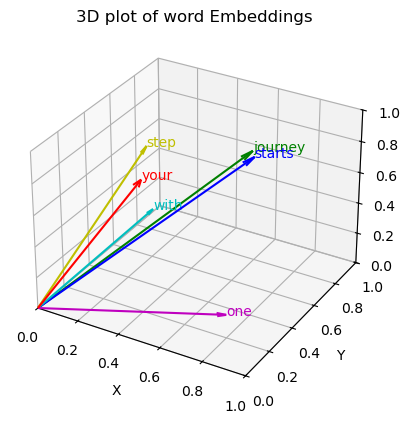

In [5]:
# create 3D plot with vectors from origin to each point using diff colors
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

colors = ['r','g','b','c','m','y']

# plot each vector with different color and annotate with corresponding word
for (x,y,z , word ,color) in zip(x_coords, y_coords,z_coords,words,colors):
    ax.quiver(0,0,0,x,y,z,color = color, arrow_length_ratio = 0.05)
    ax.text(x,y,z,word, fontsize=10,color= color)


# set label for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# set plot limits to keep arrows witthin the plot boundaries
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.title('3D plot of word Embeddings')
plt.show()

In [10]:
query = inputs[1] # 2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8500, 0.7070, 1.0952])


In [12]:
norm_attn_scores_2 = attn_scores_2 / attn_scores_2.sum()

print("normalize attn score for word 2:", norm_attn_scores_2)
print("sum of attetion weights:",norm_attn_scores_2.sum())

normalize attn score for word 2: tensor([0.1451, 0.2273, 0.2243, 0.1292, 0.1075, 0.1665])
sum of attetion weights: tensor(1.)


In [18]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim = 0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("softmax_attention:",attn_weights_2_naive)
print("sum of softmax attention:",attn_weights_2_naive.sum())

softmax_attention: tensor([0.1382, 0.2374, 0.2328, 0.1245, 0.1079, 0.1591])
sum of softmax attention: tensor(1.)


In [21]:
attn_weights_2 = torch.softmax(attn_scores_2,dim = 0)

print("softmax_attention:",attn_weights_2)
print("sum of softmax attention:",attn_weights_2.sum())

softmax_attention: tensor([0.1382, 0.2374, 0.2328, 0.1245, 0.1079, 0.1591])
sum of softmax attention: tensor(1.)


In [25]:
query = inputs[1] #2nd token

context_vec_2 = torch.zeros(query.shape)

for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]  * x_i

print(context_vec_2)

tensor([0.4411, 0.6532, 0.5693])


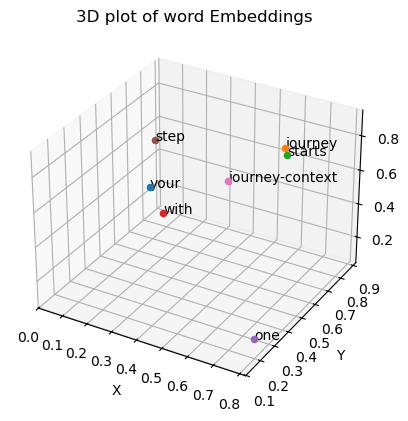

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


inputs = torch.tensor(
  [[0.43, 0.15, 0.89],          # your      (x^1)
     [0.55, 0.87, 0.66],        # journey   (x^2)
     [0.57, 0.85, 0.64],        # starts    (x^3)
     [0.22, 0.58, 0.34],        # with      (x^4)
     [0.77, 0.25, 0.10],        # one       (x^5)
     [0.05, 0.81, 0.55],         # step      (x^6)
     [0.4411, 0.6532, 0.5693]]
)

words = ["your","journey","starts","with","one","step","journey-context"]

x_coords = inputs[:,0].numpy()
y_coords = inputs[:,1].numpy()
z_coords = inputs[:,2].numpy()


# create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')


# plot each point and annotate with corresponding word
for x,y,z , word in zip(x_coords, y_coords,z_coords,words):
    ax.scatter(x,y,z)
    ax.text(x,y,z,word, fontsize=10)


# set label for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D plot of word Embeddings')
plt.show()

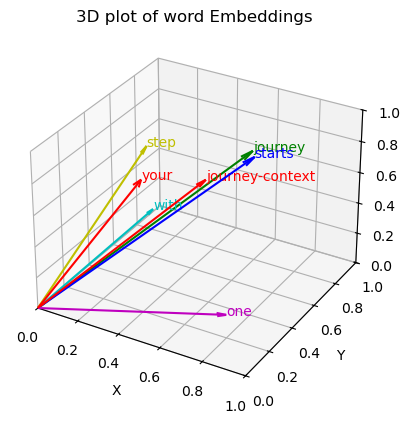

In [31]:
# create 3D plot with vectors from origin to each point using diff colors
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

colors = ['r','g','b','c','m','y','r']

# plot each vector with different color and annotate with corresponding word
for (x,y,z , word ,color) in zip(x_coords, y_coords,z_coords,words,colors):
    ax.quiver(0,0,0,x,y,z,color = color, arrow_length_ratio = 0.05)
    ax.text(x,y,z,word, fontsize=10,color= color)


# set label for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# set plot limits to keep arrows witthin the plot boundaries
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.title('3D plot of word Embeddings')
plt.show()

In [33]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89],          # your      (x^1)
     [0.55, 0.87, 0.66],        # journey   (x^2)
     [0.57, 0.85, 0.64],        # starts    (x^3)
     [0.22, 0.58, 0.34],        # with      (x^4)
     [0.77, 0.25, 0.10],        # one       (x^5)
     [0.05, 0.81, 0.55],   
  ])

attn_scores = torch.empty(6,6)

for i , x_i in enumerate(inputs):
    for j , x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4842, 0.4576, 0.6325],
        [0.9544, 1.4950, 1.4754, 0.8500, 0.7070, 1.0952],
        [0.9422, 1.4754, 1.4570, 0.8360, 0.7154, 1.0690],
        [0.4842, 0.8500, 0.8360, 0.5004, 0.3484, 0.6678],
        [0.4576, 0.7070, 0.7154, 0.3484, 0.6654, 0.2960],
        [0.6325, 1.0952, 1.0690, 0.6678, 0.2960, 0.9611]])


In [35]:
attn_scores = inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4842, 0.4576, 0.6325],
        [0.9544, 1.4950, 1.4754, 0.8500, 0.7070, 1.0952],
        [0.9422, 1.4754, 1.4570, 0.8360, 0.7154, 1.0690],
        [0.4842, 0.8500, 0.8360, 0.5004, 0.3484, 0.6678],
        [0.4576, 0.7070, 0.7154, 0.3484, 0.6654, 0.2960],
        [0.6325, 1.0952, 1.0690, 0.6678, 0.2960, 0.9611]])

In [40]:
# softmax normalization


attn_weights = torch.softmax(attn_scores, dim = -1)
attn_weights

tensor([[0.2096, 0.2003, 0.1979, 0.1252, 0.1219, 0.1452],
        [0.1382, 0.2374, 0.2328, 0.1245, 0.1079, 0.1591],
        [0.1387, 0.2364, 0.2321, 0.1247, 0.1106, 0.1575],
        [0.1438, 0.2073, 0.2044, 0.1461, 0.1255, 0.1728],
        [0.1525, 0.1957, 0.1974, 0.1368, 0.1878, 0.1298],
        [0.1375, 0.2183, 0.2127, 0.1424, 0.0982, 0.1909]])

In [41]:
attn_weights.sum(dim = -1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [ ]:
all_context_vectors = attn_weights @ inputs  
all_context_vectors  #[0.4411, 0.6532, 0.5693]]

tensor([[0.4417, 0.5946, 0.5800],
        [0.4411, 0.6532, 0.5693],
        [0.4424, 0.6513, 0.5681],
        [0.4298, 0.6318, 0.5529],
        [0.4669, 0.5924, 0.5279],
        [0.4169, 0.6532, 0.5658]])